In [31]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential



In [32]:
DATA_DIR = 'E:/DL/datasets/CIFR(Ass2&3)'

In [33]:
train_data = pd.read_csv(DATA_DIR + '/train_data.csv')

In [34]:
train_data

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,pixel_11,pixel_12,pixel_13,pixel_14,pixel_15,pixel_16,pixel_17,pixel_18,pixel_19,pixel_20,pixel_21,pixel_22,pixel_23,pixel_24,pixel_25,pixel_26,pixel_27,pixel_28,pixel_29,pixel_30,pixel_31,pixel_32,pixel_33,pixel_34,pixel_35,pixel_36,pixel_37,pixel_38,pixel_39,...,pixel_3033,pixel_3034,pixel_3035,pixel_3036,pixel_3037,pixel_3038,pixel_3039,pixel_3040,pixel_3041,pixel_3042,pixel_3043,pixel_3044,pixel_3045,pixel_3046,pixel_3047,pixel_3048,pixel_3049,pixel_3050,pixel_3051,pixel_3052,pixel_3053,pixel_3054,pixel_3055,pixel_3056,pixel_3057,pixel_3058,pixel_3059,pixel_3060,pixel_3061,pixel_3062,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071,label
0,59,62,63,43,46,45,50,48,43,68,54,42,98,73,52,119,91,63,139,107,75,145,110,80,149,117,89,149,120,93,131,103,77,125,99,76,142,115,91,144,...,148,103,77,161,105,69,144,95,55,112,90,59,119,91,58,130,96,65,120,87,59,92,67,46,103,78,57,170,140,104,216,184,140,151,118,84,123,92,72,6
1,154,177,187,126,137,136,105,104,95,102,101,99,125,131,139,155,166,180,172,190,210,180,199,214,142,156,156,111,120,110,106,107,98,109,104,102,123,121,117,127,...,5,6,11,6,6,11,10,9,12,25,22,22,51,45,42,68,64,67,90,90,101,116,113,122,134,127,133,140,130,136,143,133,139,143,134,142,143,133,144,9
2,255,255,255,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,...,76,90,90,72,86,86,64,78,78,64,78,78,69,83,83,66,80,80,55,69,69,52,66,66,58,72,72,68,80,79,78,85,83,79,85,83,80,86,84,9
3,28,25,10,37,34,19,38,35,20,42,37,23,44,39,25,40,37,22,40,38,23,24,23,9,32,25,15,43,27,19,30,20,10,32,30,17,41,37,23,52,...,122,99,67,107,85,54,112,96,66,92,81,53,80,62,39,96,78,59,77,67,42,85,76,44,84,75,48,67,57,38,54,47,28,63,56,37,72,65,46,4
4,170,180,198,168,178,196,177,185,203,183,193,211,181,196,218,177,195,220,181,195,223,184,192,223,189,190,223,189,189,222,188,193,224,183,194,223,182,194,223,184,...,93,98,102,90,95,99,88,93,97,83,89,92,77,87,88,75,84,85,71,81,82,74,80,83,72,76,79,71,75,78,75,79,82,71,75,78,73,77,80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,145,161,194,151,166,199,156,171,205,155,173,203,153,173,201,153,172,201,157,177,205,161,180,210,161,180,212,161,180,212,162,181,213,165,184,216,164,183,215,163,...,51,56,75,49,55,72,50,56,72,50,56,72,46,52,68,44,48,64,44,46,61,46,48,63,42,44,59,40,42,57,39,41,56,36,38,53,37,39,54,2
49996,255,245,132,254,247,134,255,249,137,254,251,138,254,251,138,254,248,135,254,242,130,253,239,128,254,241,129,254,244,131,254,244,132,254,243,129,253,240,127,254,...,244,168,61,247,171,65,237,157,55,240,160,57,245,167,61,246,169,64,249,176,68,248,171,64,245,174,76,249,175,82,249,174,79,252,181,81,253,181,76,6
49997,35,178,235,40,176,239,42,176,241,39,180,239,43,181,237,45,180,237,48,181,238,51,181,239,53,183,241,56,183,241,58,182,242,59,182,242,58,183,240,61,...,47,71,97,53,77,102,52,73,96,46,68,91,45,68,94,50,77,104,50,77,103,45,71,96,42,68,93,36,62,87,27,52,77,21,43,66,12,31,50,9
49998,189,211,240,186,208,236,185,207,235,184,207,235,182,206,234,181,205,232,180,204,232,180,204,233,181,205,235,180,204,234,179,202,233,180,202,232,183,202,229,185,...,114,112,103,142,141,130,164,162,149,175,171,160,184,177,166,190,181,171,190,182,171,193,186,172,192,185,169,190,182,165,195,184,169,196,189,171,195,190,171,1


In [35]:
images = train_data.drop('label',axis=1)
images

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,pixel_11,pixel_12,pixel_13,pixel_14,pixel_15,pixel_16,pixel_17,pixel_18,pixel_19,pixel_20,pixel_21,pixel_22,pixel_23,pixel_24,pixel_25,pixel_26,pixel_27,pixel_28,pixel_29,pixel_30,pixel_31,pixel_32,pixel_33,pixel_34,pixel_35,pixel_36,pixel_37,pixel_38,pixel_39,...,pixel_3032,pixel_3033,pixel_3034,pixel_3035,pixel_3036,pixel_3037,pixel_3038,pixel_3039,pixel_3040,pixel_3041,pixel_3042,pixel_3043,pixel_3044,pixel_3045,pixel_3046,pixel_3047,pixel_3048,pixel_3049,pixel_3050,pixel_3051,pixel_3052,pixel_3053,pixel_3054,pixel_3055,pixel_3056,pixel_3057,pixel_3058,pixel_3059,pixel_3060,pixel_3061,pixel_3062,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071
0,59,62,63,43,46,45,50,48,43,68,54,42,98,73,52,119,91,63,139,107,75,145,110,80,149,117,89,149,120,93,131,103,77,125,99,76,142,115,91,144,...,83,148,103,77,161,105,69,144,95,55,112,90,59,119,91,58,130,96,65,120,87,59,92,67,46,103,78,57,170,140,104,216,184,140,151,118,84,123,92,72
1,154,177,187,126,137,136,105,104,95,102,101,99,125,131,139,155,166,180,172,190,210,180,199,214,142,156,156,111,120,110,106,107,98,109,104,102,123,121,117,127,...,28,5,6,11,6,6,11,10,9,12,25,22,22,51,45,42,68,64,67,90,90,101,116,113,122,134,127,133,140,130,136,143,133,139,143,134,142,143,133,144
2,255,255,255,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,...,92,76,90,90,72,86,86,64,78,78,64,78,78,69,83,83,66,80,80,55,69,69,52,66,66,58,72,72,68,80,79,78,85,83,79,85,83,80,86,84
3,28,25,10,37,34,19,38,35,20,42,37,23,44,39,25,40,37,22,40,38,23,24,23,9,32,25,15,43,27,19,30,20,10,32,30,17,41,37,23,52,...,55,122,99,67,107,85,54,112,96,66,92,81,53,80,62,39,96,78,59,77,67,42,85,76,44,84,75,48,67,57,38,54,47,28,63,56,37,72,65,46
4,170,180,198,168,178,196,177,185,203,183,193,211,181,196,218,177,195,220,181,195,223,184,192,223,189,190,223,189,189,222,188,193,224,183,194,223,182,194,223,184,...,101,93,98,102,90,95,99,88,93,97,83,89,92,77,87,88,75,84,85,71,81,82,74,80,83,72,76,79,71,75,78,75,79,82,71,75,78,73,77,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,145,161,194,151,166,199,156,171,205,155,173,203,153,173,201,153,172,201,157,177,205,161,180,210,161,180,212,161,180,212,162,181,213,165,184,216,164,183,215,163,...,75,51,56,75,49,55,72,50,56,72,50,56,72,46,52,68,44,48,64,44,46,61,46,48,63,42,44,59,40,42,57,39,41,56,36,38,53,37,39,54
49996,255,245,132,254,247,134,255,249,137,254,251,138,254,251,138,254,248,135,254,242,130,253,239,128,254,241,129,254,244,131,254,244,132,254,243,129,253,240,127,254,...,63,244,168,61,247,171,65,237,157,55,240,160,57,245,167,61,246,169,64,249,176,68,248,171,64,245,174,76,249,175,82,249,174,79,252,181,81,253,181,76
49997,35,178,235,40,176,239,42,176,241,39,180,239,43,181,237,45,180,237,48,181,238,51,181,239,53,183,241,56,183,241,58,182,242,59,182,242,58,183,240,61,...,92,47,71,97,53,77,102,52,73,96,46,68,91,45,68,94,50,77,104,50,77,103,45,71,96,42,68,93,36,62,87,27,52,77,21,43,66,12,31,50
49998,189,211,240,186,208,236,185,207,235,184,207,235,182,206,234,181,205,232,180,204,232,180,204,233,181,205,235,180,204,234,179,202,233,180,202,232,183,202,229,185,...,88,114,112,103,142,141,130,164,162,149,175,171,160,184,177,166,190,181,171,190,182,171,193,186,172,192,185,169,190,182,165,195,184,169,196,189,171,195,190,171


In [36]:
images.shape

(50000, 3072)

In [37]:
labels = train_data['label']
labels.shape

(50000,)

In [38]:
images = images.values.reshape((50000,32,32,3)).astype('float32')/255
images.shape

(50000, 32, 32, 3)

In [39]:
labels = labels.values

In [40]:
labels.shape

(50000,)

In [41]:
num_classes = 10
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

In [42]:
test_data = pd.read_csv(DATA_DIR + '/test_data.csv')


In [43]:
test_images = test_data.drop('label',axis=1).values.reshape((10000,32,32,3)).astype('float32')/255
test_labels = test_data['label'].values

In [44]:
test_images.shape

(10000, 32, 32, 3)

In [45]:
labels = tf.keras.utils.to_categorical(labels, num_classes)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes)

In [46]:
labels[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

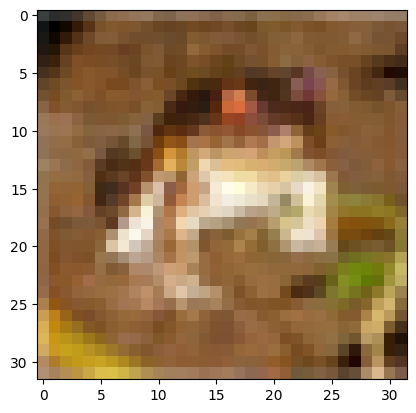

In [47]:
import matplotlib.pyplot as plt
plt.imshow(images[0])

In [48]:
labels.shape

(50000, 10)

In [49]:
ff_model = Sequential()

ff_model.add(Flatten(input_shape=(32,32,3)))
ff_model.add(Dense(128, activation='relu',))
ff_model.add(Dropout(0.2))
ff_model.add(Dense(64,activation='relu'))
ff_model.add(Dropout(0.2))
ff_model.add(Dense(32,activation='relu'))
ff_model.add(Dense(10,activation='softmax'))

ff_model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
ff_model.summary()

e:\DL\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 404,010 (1.54 MB)

 Trainable params: 404,010 (1.54 MB)

 Non-trainable params: 0 (0.00 B)

In [59]:
cnn_model = Sequential()

cnn_model.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
cnn_model.add(MaxPooling2D((2,2)))
cnn_model.add(Conv2D(64,(3,3),activation='relu'))
cnn_model.add(MaxPooling2D((2,2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(64,activation='relu'))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(10,activation='softmax'))

cnn_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
cnn_model.summary()

e:\DL\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
history = cnn_model.fit(images,labels,epochs=11,batch_size=128,validation_data=(test_images,test_labels))

Epoch 1/11
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 45ms/step - accuracy: 0.3036 - loss: 1.8968 - val_accuracy: 0.5204 - val_loss: 1.3738
Epoch 2/11
391/391 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - accuracy: 0.4855 - loss: 1.4292 - val_accuracy: 0.5732 - val_loss: 1.2144
Epoch 3/11
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - accuracy: 0.5519 - loss: 1.2679 - val_accuracy: 0.5967 - val_loss: 1.1526
Epoch 4/11
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.5823 - loss: 1.1765 - val_accuracy: 0.6208 - val_loss: 1.0826
Epoch 5/11
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - accuracy: 0.6154 - loss: 1.1008 - val_accuracy: 0.6523 - val_loss: 0.9965
Epoch 6/11
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 46ms/step - accuracy: 0.6351 - loss: 1.0339 - val_accuracy: 0.6569 - val_loss: 0.9903
Epoch 7/11
391/391 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - accuracy: 0.6447 - loss: 1.0011 - val_accuracy: 0.6743 - val_loss: 0.9457
Epoch 8/11
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - accuracy: 0.6645 - loss: 0.9482 - 

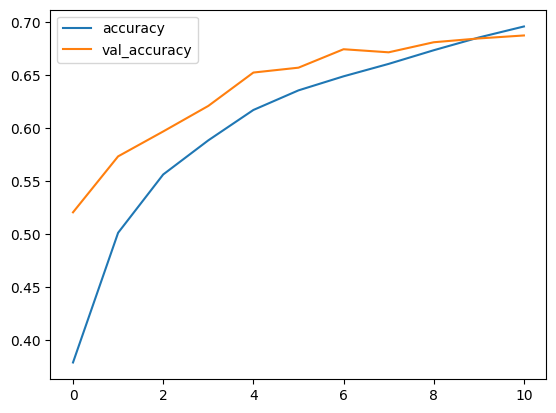

In [61]:
plt.plot(cnn_model.history.history['accuracy'],label='accuracy')
plt.plot(cnn_model.history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

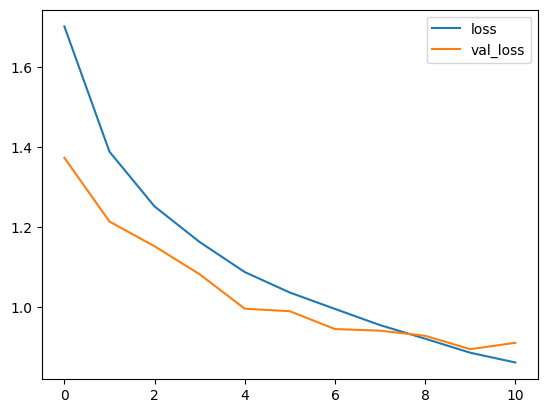

In [62]:
plt.plot(cnn_model.history.history['loss'],label='loss')
plt.plot(cnn_model.history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [63]:
pred = cnn_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [64]:
loss,acc = cnn_model.evaluate(test_images,test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6858 - loss: 0.9142


In [65]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

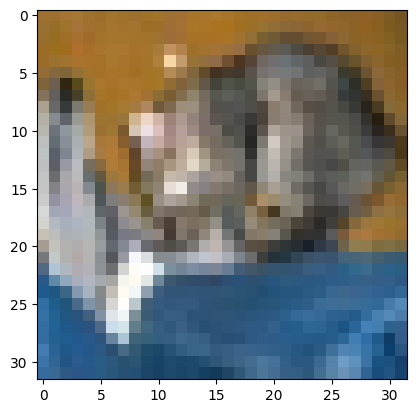

In [66]:
plt.imshow(test_images[0])

In [67]:
print(class_names[np.argmax(pred[0])])

cat
